In [2]:
%matplotlib inline

# IMDb Data Analysis

In the following document we will take a look into the IMDb, the Image Movie Database, probably the largest collection of information related to movies, television shows and games. The IMDb is currently owned by Amazon, has ~75 million users and is on Alexa Rank 55 (April 2017). It was founded 17th October 1990 (26 years ago!).

The IMDb provides a dump of the data in list format, which can be downloaded from imdb.com/interfaces

## Intialization

At the beginnigs we need to import some libraries for extracting the information from the IMDb and plotting our findings.

In [3]:
import extract
import collections
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Ratings analysis

First let's get the average rating of all movies, of all movies with more than 1500 votes and all movies with more than 25000 votes, just to get a feeling for the ratings in the database. 

The number of **1500 is arbitrary**. The amount of **25000 votes is used by the IMDb itself** as a restriction for any movie to be able enter the "TOP 250 Movies" list.

In [4]:
ratings_sum = 0
ratings_100_sum = 0
ratings_25000_sum = 0

amount = 0
amount_100 = 0
amount_25000 = 0

ratings_list = []  # Save ratings in list for future use.

for movie in extract.get_ratings("../../database/selection/ratings.list"):
    if movie[1][0] > 25000:
        ratings_25000_sum += movie[1][1]
        amount_25000 += 1
    if movie[1][0] > 100:
        ratings_100_sum += movie[1][1]
        amount_100 += 1
        ratings_list.append(movie)
    
    ratings_sum += movie[1][1]
    amount += 1
    
print("Average rating: {0:46}. Number of movies: {1}".format(ratings_sum/amount, amount))
print("Average rating (restricted to >100 votes): {0:19}. Number of movies: {1}".format(ratings_100_sum/amount_100, amount_100))
print("Average rating (restricted to >25000 votes): {0}. Number of movies: {1}".format(ratings_25000_sum/amount_25000, amount_25000))

Average rating:                              6.945003113709419. Number of movies: 729034
Average rating (restricted to >100 votes):   6.814976524940843. Number of movies: 159957
Average rating (restricted to >25000 votes): 6.917053087757299. Number of movies: 4615


We can see that the **average** over all entries is around ~**6.945**. There are **729,034 entries** in the list.

If we restrict the movies to movies which at least recieved 100 votes, the total number of movies drops significantly to _159,957_. The rating falls to _~6.815_ this indicates that on average less voted movies get a higher score.

If we restrict even further, the average rating increases again, to 6.917, while the total amount of movies drops again to merely 4615 movies.

On a sidenote: Let's see the 10 most voted for movies

In [5]:
ratings_list.sort(key=lambda x: x[1][0], reverse=True)
for nr, movie in enumerate(ratings_list[:10]):
    print("{0:2}: {1}".format(nr+1, movie[0].title))

 1: The Shawshank Redemption
 2: The Dark Knight
 3: Inception
 4: Fight Club
 5: Pulp Fiction
 6: Forrest Gump
 7: The Lord of the Rings: The Fellowship of the Ring
 8: The Matrix
 9: The Lord of the Rings: The Return of the King
10: The Godfather


### Plotting time

Let's see a plot of Ratings vs Number of Votes. Also interesting is the number of movies per rating.

The third plot explores if there is a relationship between release year of the movie and rating.

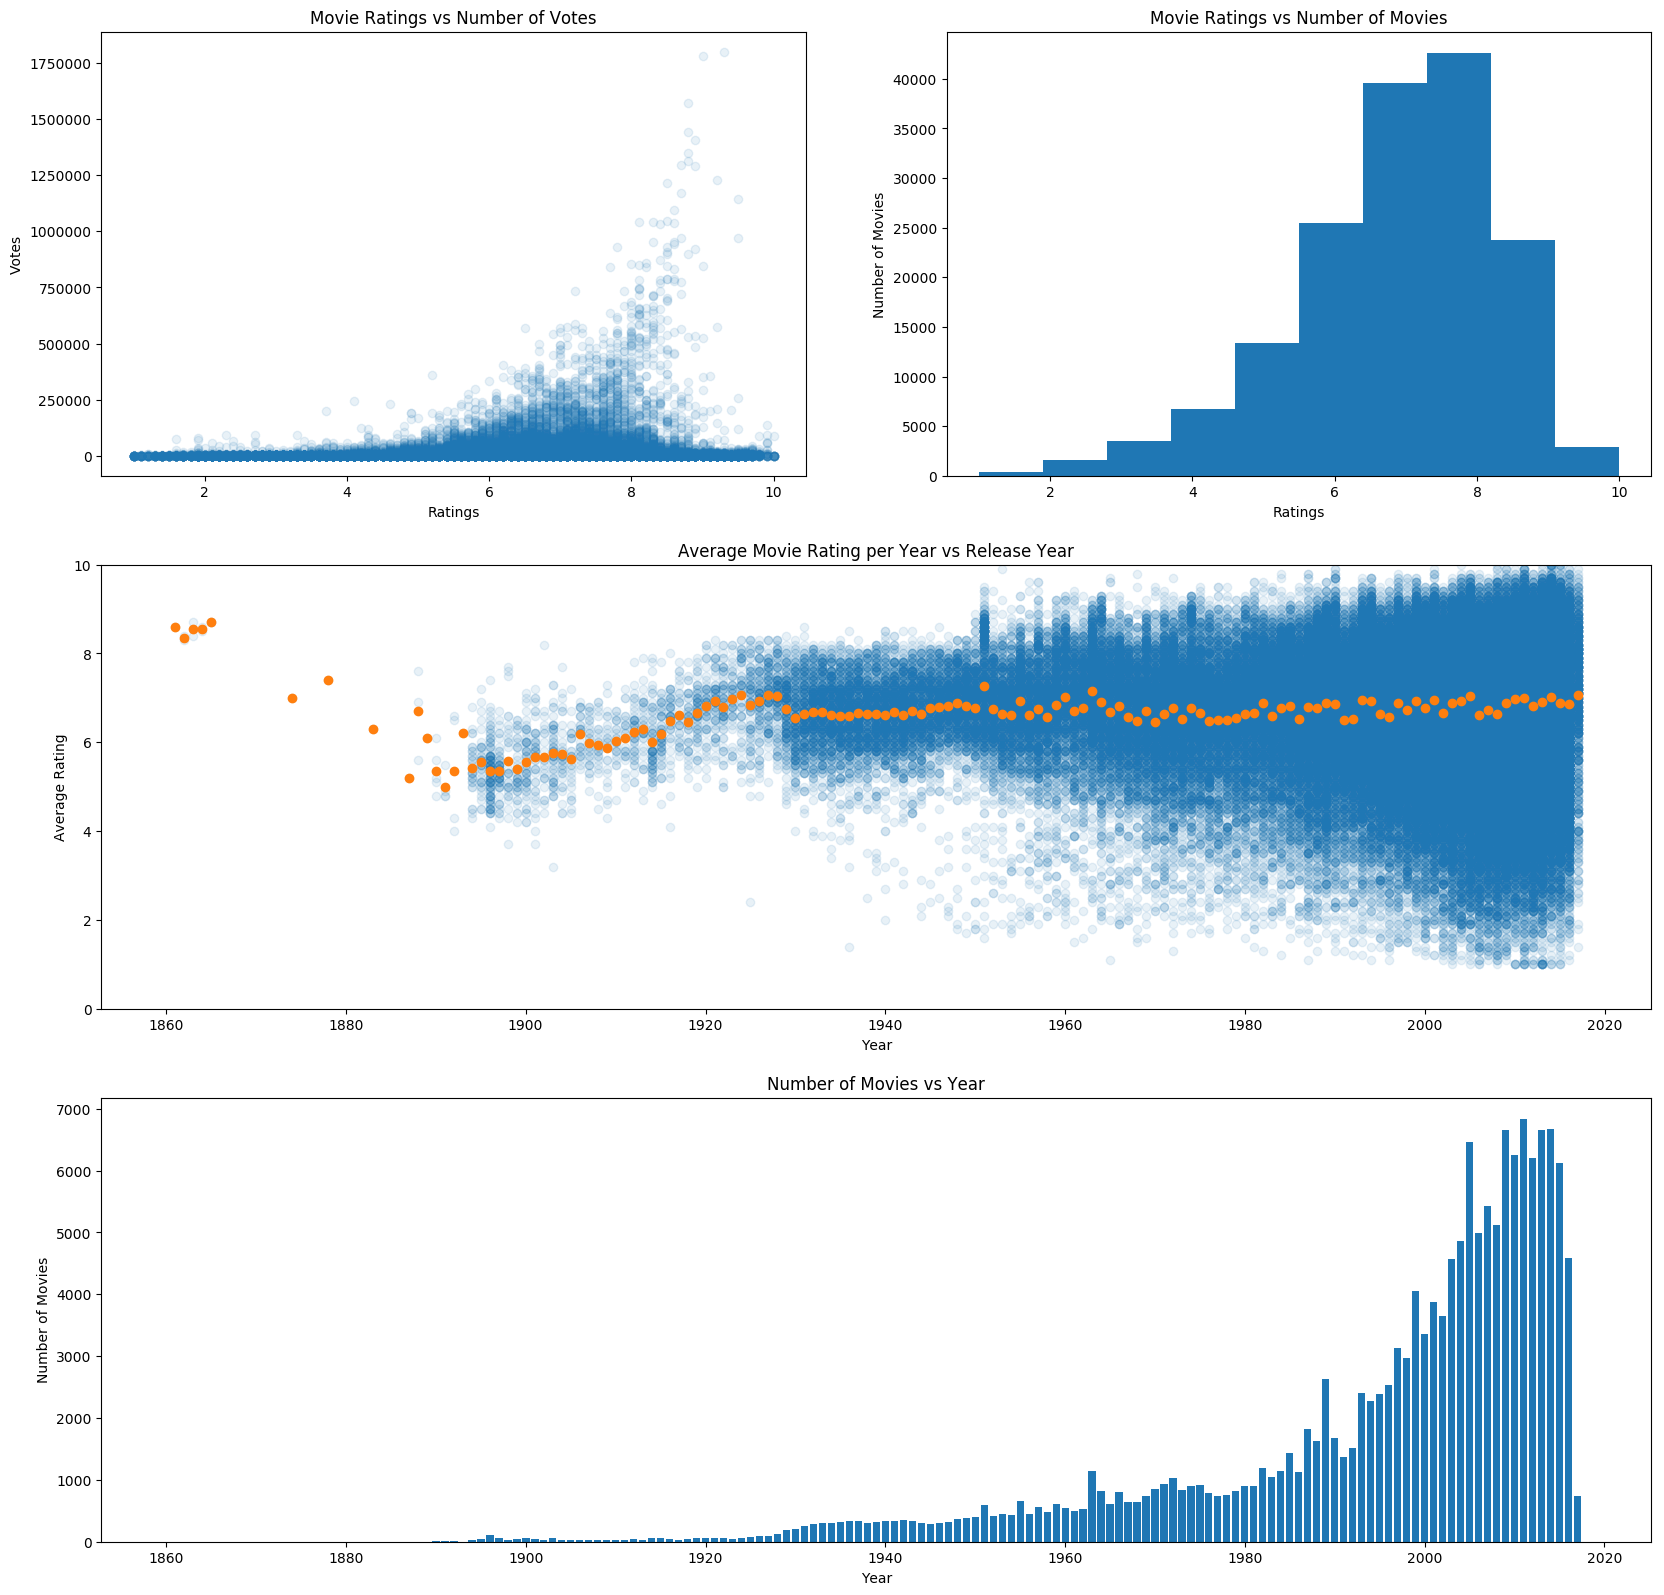

In [6]:
ratings = [movie[1][1] for movie in ratings_list]
votes = [movie[1][0] for movie in ratings_list]
years = [movie[0].year for movie in ratings_list]

# Create figure
fig = plt.figure(figsize=(20, 20), dpi=100)
gs = gridspec.GridSpec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])

# Create first plot
ax1.scatter(x=ratings, y=votes, alpha=0.1)
ax1.set_xlabel("Ratings")
ax1.set_ylabel("Votes")
ax1.set_title("Movie Ratings vs Number of Votes")

# Create second plot
ax2.hist(ratings)
ax2.set_xlabel("Ratings")
ax2.set_ylabel("Number of Movies")
ax2.set_title("Movie Ratings vs Number of Movies")

# Create third plot
sum_per_year = collections.defaultdict(int)
movies_per_year = collections.defaultdict(int)
for movie in ratings_list:
    if movie[0].year:
        sum_per_year[movie[0].year] += movie[1][1]
        movies_per_year[movie[0].year] += 1

avg_list = [(year, ratings_sum/movies_per_year[year]) for year, ratings_sum in sum_per_year.items()]
yrs, avg_ratings = zip(*avg_list)

ax3.scatter(x=years, y=ratings, alpha=0.1)
ax3.scatter(x=yrs, y=avg_ratings)
ax3.set_ylim([0, 10])
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Rating")
ax3.set_title("Average Movie Rating per Year vs Release Year")

# Create forth plot
ax4.bar(list(movies_per_year.keys()), list(movies_per_year.values()))
ax4.set_xlabel("Year")
ax4.set_ylabel("Number of Movies")
ax4.set_title("Number of Movies vs Year")

## Scatterplots

Let's look at some scatterplots now to see if there's a relationship between these values:

  - Duration vs Rating
  - Budget vs Rating
  - Gross vs Rating, budget, nr. of votes
  - Number of Keywords vs votes, budget, rating
  - Number of Locations vs votes, rating, budget
  - Duration vs Length

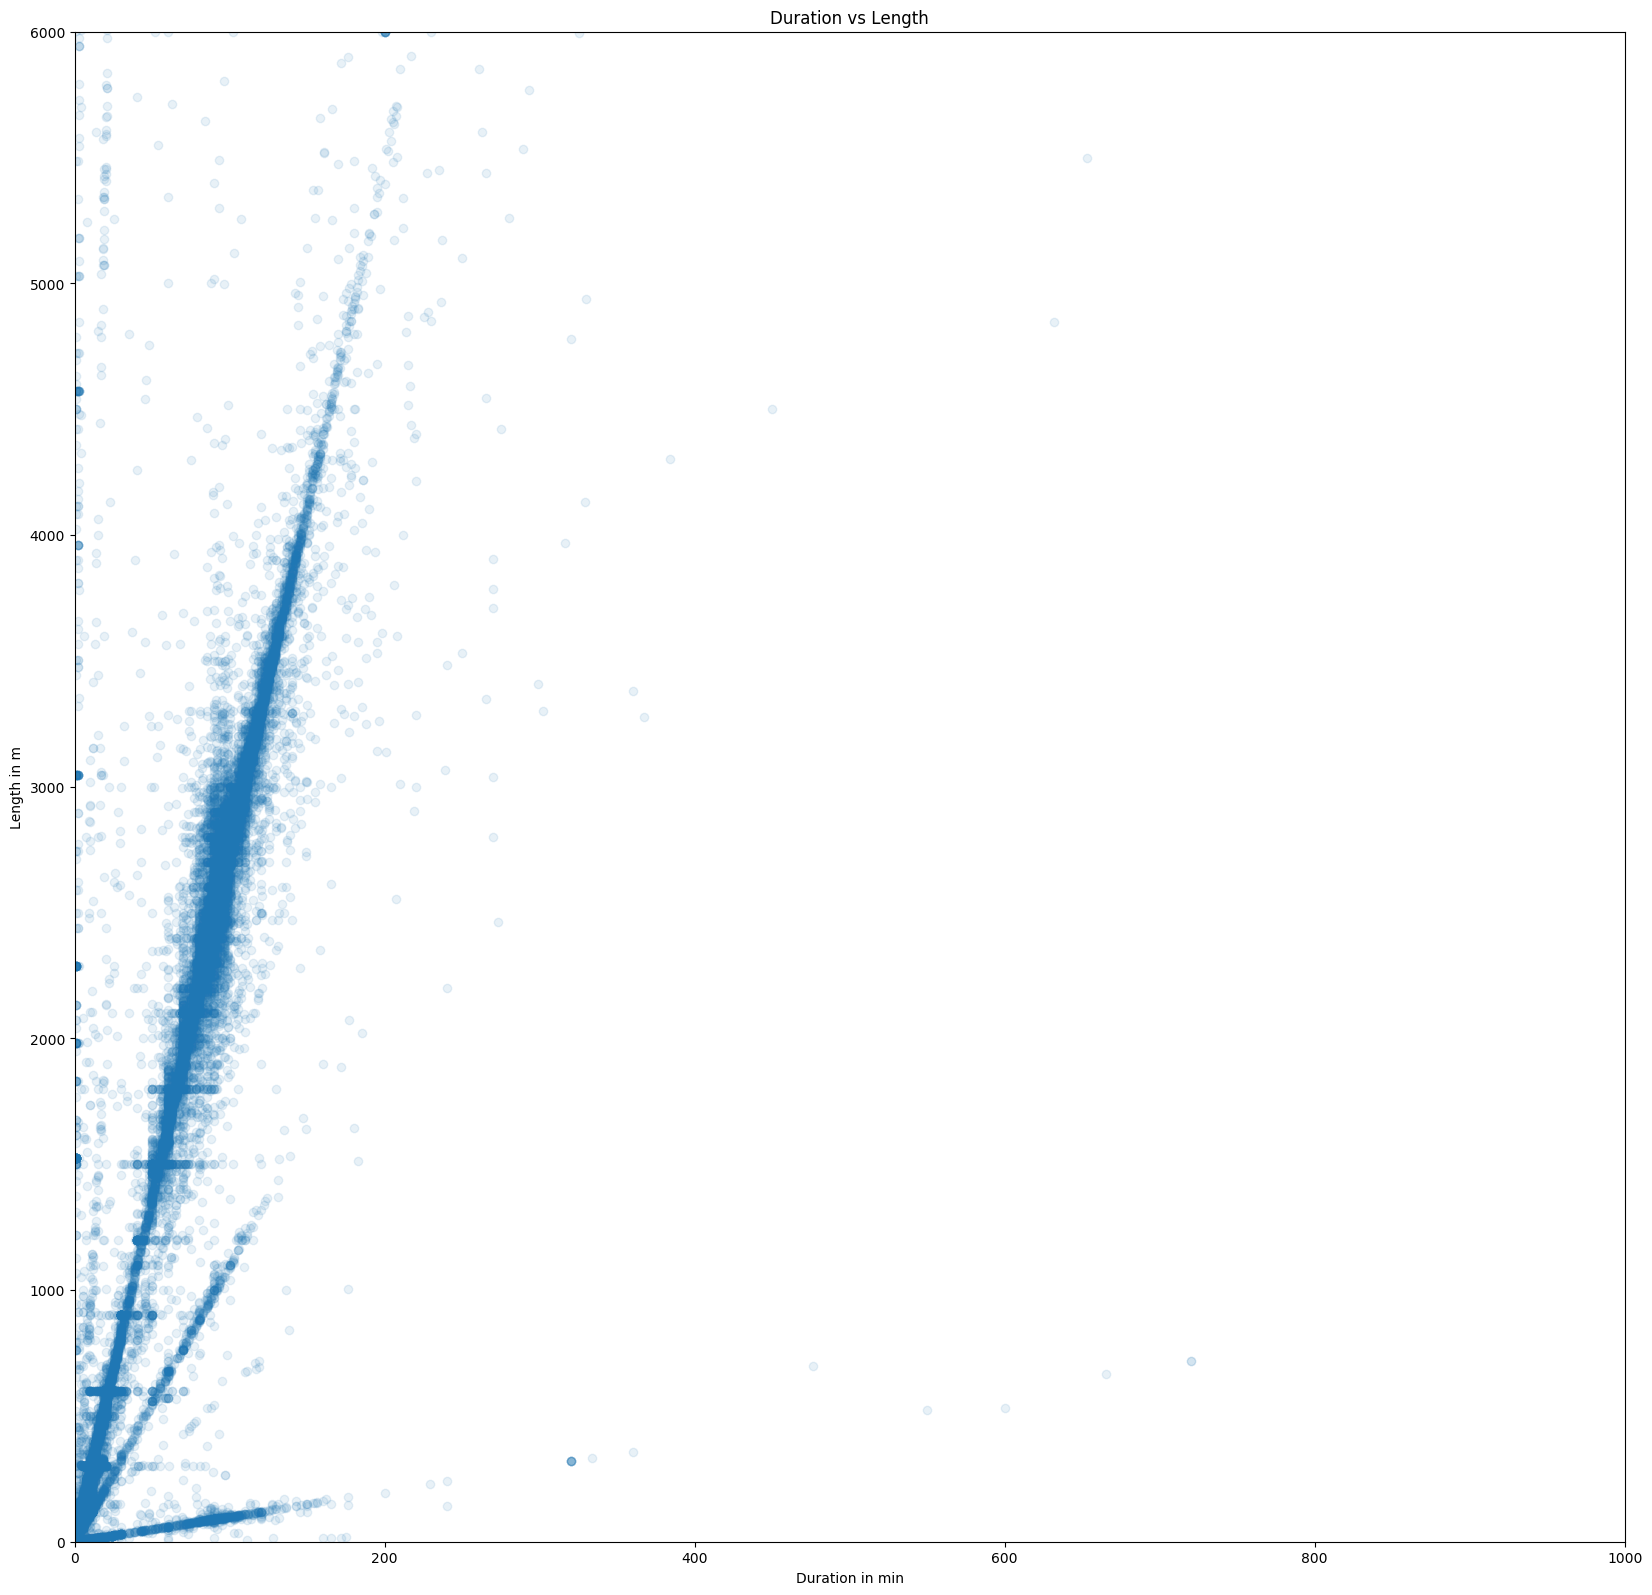

In [17]:
duration_gen = extract.get_running_times("../../database/selection/running-times.list")
technical_gen = extract.get_technicals("../../database/selection/technical.list")

combined = extract.combine_generator(duration_gen, technical_gen)

lengths = []
durations = []
for data in combined.values():
    if data[1].met and data[1].met[0] is not '':
        length = sorted(data[1].met)[-1]
        duration = sorted(data[0])[-1]

        if "-" in length:
            length = length.split("-")[1]  # If there's a range specified, take the longer
        
        length = float(length)
        duration = float(duration)
        
        if length == 0:
            continue
            
        lengths.append(length)
        durations.append(sorted(data[0])[-1])

fig = plt.figure(figsize=(20, 20), dpi=100)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 6000)
ax.scatter(x=durations, y=lengths, alpha=0.1)
ax.set_xlabel("Duration in min")
ax.set_ylabel("Length in m")
ax.set_title("Duration vs Length")

## Genres

Let's look at the genres next. Is there a prominent one aka. how many movies are in which genre? What's the average rating per genre?

## Keywords

Now take a quick look at keywords. What are the most used keywords? What's the average movie rating per keyword? Average Voter Count, Gross, Budget? What movies have the most keywords? Number of keywords vs. votes, budget, rating

## Locations

Where are the best movies shot? How many movies are shot in what country? Which movie are shot in the most locations?